 
 

This is a cars dataset having 156 observation and 16 different variables. We have to create a linear regression model using the provided predictor variables for the prediction of sales value of cars.



### Import the dataset.

In [1]:
import pandas as pd
car = pd.read_csv(r'C:\Users\SUDHIR\car_sales.csv')
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


### Check the shape of the dataset.

In [2]:
def lr():
    return car.shape 
lr()

(156, 16)

### Check the descriptive stats of the dataset.

In [3]:
def lr():
    return car.describe()
lr()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Code to understand the total count and percentage of missing values.

In [4]:
def lr():
    # Count total missing and sort it     
    miss = car.isnull().sum().sort_values(ascending = False) 
    # Calucalte percent
    mp = (car.isnull().sum() / car.isnull().count()).sort_values(ascending = False)
    # concatenate total and percent
    missing = pd.concat([miss, mp], axis = 1, keys = ['Missing_count', 'missing_percent'])
    # print missing data assigning a varibale
    return missing.head(5)
lr()

,Missing_count,missing_percent
Sales_in_thousands,5,0.032051
Power_perf_factor,0,0.000000
Latest_Launch,0,0.000000
Fuel_efficiency,0,0.000000
Fuel_capacity,0,0.000000


### Impute the missing value using "median" groupby Manufacturer. 

In [5]:

def lr():
    # your code here to impute missing value using median and groupby
    car['Sales_in_thousands'].fillna(car.groupby('Manufacturer')['Sales_in_thousands'].transform('median'),inplace = True)
    return
lr()
print (car.isnull().sum())

Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64


###  Create a dummy variable for "Vehicle_type"  and  drop the original variable.

In [6]:
car_dummy =pd.DataFrame()                                                           # Creating an empty data frame
def lr(car):
    # your code to create dummies
    car_dummy = pd.get_dummies(car, columns=['Vehicle_type'], drop_first= True)
    return car_dummy
car_dummy = lr(car)
print(car_dummy.head(5))


  Manufacturer    Model  Sales_in_thousands  _year_resale_value  \
0        Acura  Integra              16.919              16.360   
1        Acura       TL              39.384              19.875   
2        Acura       CL              14.114              18.225   
3        Acura       RL               8.588              29.725   
4         Audi       A4              20.397              22.255   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8         140      101.2   67.3   172.4   
1               28.40          3.2         225      108.1   70.3   192.9   
2               29.00          3.2         225      106.9   70.6   192.0   
3               42.00          3.5         210      114.6   71.4   196.6   
4               23.99          1.8         150      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0        2.639           13.2               28      2/2/2012   
1        3.5

###  Drop the below mentioned variables which will not help in prediction of sales.
``` ['Manufacturer', 'Model', 'Latest_Launch'] ```

In [7]:
def lr(car_dummy):
    # your code to drop the useless variables
    car_drop = car_dummy.drop(labels=None, axis=1, index=None, columns=['Manufacturer', 'Model', 'Latest_Launch'], level=None, inplace=False, errors='raise')
    return car_drop
car_dummy = lr(car_dummy)
print(car_dummy.head(5))


   Sales_in_thousands  _year_resale_value  Price_in_thousands  Engine_size  \
0              16.919              16.360               21.50          1.8   
1              39.384              19.875               28.40          3.2   
2              14.114              18.225               29.00          3.2   
3               8.588              29.725               42.00          3.5   
4              20.397              22.255               23.99          1.8   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
0         140      101.2   67.3   172.4        2.639           13.2   
1         225      108.1   70.3   192.9        3.517           17.2   
2         225      106.9   70.6   192.0        3.470           17.2   
3         210      114.6   71.4   196.6        3.850           18.0   
4         150      102.6   68.2   178.0        2.998           16.4   

   Fuel_efficiency  Power_perf_factor  Vehicle_type_Passenger  
0               28          58.280150   

### Check for outliers using Box Plot

In [8]:
def lr():
    import seaborn as sns
    sns.boxplot(data=car_dummy, orient="h", palette="Set2")
    return None 
lr()

###  Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.

In [9]:
def lr(car_dummy):
    import pandas as pd
    # Calculate Q1 value using quantile(0.05)
    Q1 = car_dummy.quantile(q=0.05)
    # Calculate Q3 value using quantile value (0.95)
    Q3 = car_dummy.quantile(q=0.95)
    # Calculate Inter Quartile Range
    Q_diff = Q3 - Q1
    # create a variable and check for outliers and drop them off
    car_out = car_dummy[~((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)]
          
    return car_out
car_dummy = lr(car_dummy)
car_dummy.shape

(154, 13)

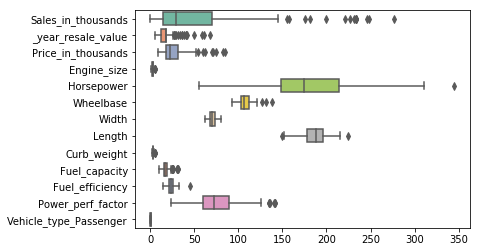

In [10]:
def lr1():
    import seaborn as sns
    sns.boxplot(data=car_dummy, orient="h", palette="Set2")
    return None 
lr1()

###  Write code to standardize the variable for model building (return value will be numpy.ndarray).

In [11]:
std = pd.DataFrame()
car_modify = car_dummy.drop(car_dummy[['Sales_in_thousands']], axis=1)
def lr(car_modify):
    from sklearn.preprocessing import StandardScaler
    # code to scale the variables
    car_scalar = StandardScaler().fit_transform(car_modify)
    # code to transform the variables and standardize them
    return car_scalar
std = lr(car_modify)
print(std[1])

[ 0.2147879   0.09116773  0.18859201  0.77851497  0.10306365 -0.22729613
  0.43698582  0.22647767 -0.18117654  0.25690808  0.64045582  0.58234907]


In [12]:
print(std)

[[-0.15270566 -0.40386698 -1.26877133 ...  0.97191732 -0.76842508
   0.58234907]
 [ 0.2147879   0.09116773  0.18859201 ...  0.25690808  0.64045582
   0.58234907]
 [ 0.04228025  0.13421423  0.18859201 ...  0.4952445   0.59678186
   0.58234907]
 ...
 [ 0.02638605  0.11986539 -0.64418704 ...  0.25690808 -0.22021826
   0.58234907]
 [ 0.02638605  1.31799289 -0.74828442 ... -0.21976475  1.07697408
   0.58234907]
 [ 0.02638605  0.63642335 -0.12370014 ...  0.01857167  0.40053237
   0.58234907]]


###  Write a code to create a DataFrame from the standardized value calculated above

### Since the standardized value is a numpy array, add the data to a dataframe with column header as mentioned below in the same order

```['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger'] ```

In [13]:
columns = ['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger']
def lr(std):
    # create a dataframe cars for the numpy array
    cars = pd.DataFrame(data=std, index=None, columns=columns, dtype=None, copy=False)
    # assign the column headers with the columns mentioned above
    return cars
cars = lr(std)

In [14]:
cars.head()

,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,-0.152706,-0.403867,-1.268771,-0.835991,-0.856756,-1.114212,-1.126791,-1.172960,-1.218395,0.971917,-0.768425,0.582349
1,0.214788,0.091168,0.188592,0.778515,0.103064,-0.227296,0.436986,0.226478,-0.181177,0.256908,0.640456,0.582349
2,0.042280,0.134214,0.188592,0.778515,-0.063862,-0.138605,0.368332,0.151565,-0.181177,0.495244,0.596782,0.582349
3,1.244606,1.066888,0.500884,0.493602,1.007242,0.097906,0.719229,0.757244,0.026267,-0.458101,0.641265,0.582349
4,0.463617,-0.225224,-1.268771,-0.646049,-0.662010,-0.848137,-0.699613,-0.600753,-0.388620,0.733581,-0.576938,0.582349


###  Now since all variable may not be of use, please extract only the following variables for training. Preparing X (independent features) for the model building.

```['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']```

In [15]:
X = pd.DataFrame()
feature_cols = ['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']                
def lr(cars):
    # assign values of fature_cols to X
    #X= pd.DataFrame(cars[columns], columns= feature_cols)
    X= cars[feature_cols]
    return X
X = lr(cars)
print(X.head())

   Price_in_thousands  Engine_size  Wheelbase  Fuel_efficiency  \
0           -0.403867    -1.268771  -0.856756         0.971917   
1            0.091168     0.188592   0.103064         0.256908   
2            0.134214     0.188592  -0.063862         0.495244   
3            1.066888     0.500884   1.007242        -0.458101   
4           -0.225224    -1.268771  -0.662010         0.733581   

   Vehicle_type_Passenger  
0                0.582349  
1                0.582349  
2                0.582349  
3                0.582349  
4                0.582349  


### Check for the type and shape of X.

In [16]:
def lr():
    print(type(X))
    print(X.shape)
lr()

<class 'pandas.core.frame.DataFrame'>
(154, 5)


###  Extract y (dependent variable) for model building.
```['Sales_in_thousands']```

In [17]:
y = pd.DataFrame()
def lr(car_dummy):
    # assign the dependent variable to y dataframe
    y=car_dummy['Sales_in_thousands']
    return y
y = lr(car_dummy)
print(y.head())

0    16.919
1    39.384
2    14.114
3     8.588
4    20.397
Name: Sales_in_thousands, dtype: float64


### Check for the type and shape of y. 

In [18]:
def lr():
    print(type(y))
    print(y.shape)
lr()

<class 'pandas.core.series.Series'>
(154,)


<a id=section403></a>

###  Split the value of X and y into train and test datasets.

In [19]:
from sklearn.cross_validation import train_test_split
def lr():
    return train_test_split(X, y, test_size = 0.7, random_state = 1)

# train test split using train test split of 70:30 and random state=1
X_train, X_test, y_train, y_test = lr()

C:\Users\SUDHIR\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Check the shape of  X and y of train dataset.

In [20]:
def lr():
    print(X_train.shape)
    print(y_train.shape)
lr()

(46, 5)
(46,)


### Check the shape of X and y of test dataset.

In [21]:
def lr():
    print(X_test.shape)
    print(y_test.shape)
lr()

(108, 5)
(108,)


<a id=section404></a>

###  Instantiate Linear regression model using scikit-learn

In [22]:
from sklearn.linear_model import LinearRegression
def lr():
    #initiate the linear regression model to new variable linreg
    linreg = LinearRegression()
    return linreg
linreg = lr()

###   Fit the linear model on X_train and y_train.

In [23]:
def lr():
    # fit the X_train and y_train
    linreg.fit(X_train, y_train)
    # We don't expect any return from your side.
lr()

<a id=section405></a>

###  Interpret the Model Coefficients.

In [24]:
def lr():
    # print the linreg.intercet
    print('intercept is - ', linreg.intercept_)
        # print the linreg.coefficient
    print('coefficients are - ', linreg.coef_)
lr()

intercept is -  56.882889291718335
coefficients are -  [-38.27178224  24.34336429  28.843472    16.3812925  -10.86982324]


###  Zip the features to pair the feature names with the coefficients.

In [25]:
feature_cols = ['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']                

def lr():
    # insert Intercept variable with the feature_cols
    feature_cols.insert(0, 'Intercept')
    # make a list using linreg.coef
    list_ = linreg.coef_.tolist()
    # insert the intercept value respectively
    list_.insert(0, linreg.intercept_ )
    # creating a variable to zip feature_cols and their coef.
    zip_ = zip(feature_cols, list_)
    # use for loop the get the value of feature_cols and their coef
    for a1, a2 in zip_:
        print(a1, a2)
    # print the above values
lr()

Intercept 56.882889291718335
Price_in_thousands -38.271782238336904
Engine_size 24.343364286387096
Wheelbase 28.84347200445729
Fuel_efficiency 16.38129249901723
Vehicle_type_Passenger -10.869823242174665


###   Predict the train value using the built model.

In [26]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    # provide column header as sales for pred
    pred.columns = ['sales']
    # check for head 
    head = pred.head()
    return head
lr()

,sales
0,43.536081
1,104.777123
2,48.515332
3,108.087702
4,54.439044


###  Predict the test value using the built model.

In [27]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    # provide column header as sales for pred
    pred_test.columns = ['sales']
    # check for head
    head = pred_test.head()
    return head
lr()

,sales
0,42.383811
1,76.134192
2,22.754072
3,25.347419
4,68.563857


<a id=section406></a>

###  Evaluate the model using Mean Absolute Error metrics for both train and test.

In [28]:
from sklearn import metrics
def lr():
    # Calculate MAE for train 
    from sklearn.metrics import mean_absolute_error
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    # Calculate MAE for test 
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    # print MAE for train
    print(MAE_train)
    # print MAE for test
    print(MAE_test)
lr()

43.49739694066547
43.6772432180152


###  Evaluate the model using Mean Squared Error for both train and test.

In [29]:
def lr():
    # Calculate MSE for train 
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    # Calculate MSE for test 
    MSE_test = metrics. mean_squared_error(y_test, y_pred_test)
    # print MSE for train
    print('MSE for train is {}'.format(MSE_train))
    # print MSE for test
    print('MSE for test is {}'.format(MSE_test))
lr()

MSE for train is 3893.6701020851588
MSE for test is 3634.7543287859994


###   Evaluate the model using Root Mean Squared Error for both train and test.

In [30]:
import numpy as np
def lr():
    # Calculate RMSE for train 
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    # Calculate RMSE for test 
    RMSE_test = np.sqrt(metrics. mean_squared_error(y_test, y_pred_test))
    # print RMSE for train
    print('RMSE train is {}'.format(RMSE_train))
    # print RMSE for test
    print('RMSE test is {}'.format(RMSE_test))
lr()

RMSE train is 62.39927965998613
RMSE test is 60.288923765365055


###  Evaluate the model using R-square value for both train and test.

In [31]:
from sklearn.metrics import r2_score
def lr():
    # Calculate r2 for train 
    r2_train = metrics.r2_score(y_train, y_pred_train)
    # Calculate r2 for test 
    r2_test = metrics.r2_score(y_test, y_pred_test)
    # print r2 for train
    print(r2_train)
    # print r2 for test
    print(r2_test)
lr()

0.21409275419135465
0.02978659387476279
